<a href="https://colab.research.google.com/github/uervitonsantos/Exercicios_Metodos_Quantitativos/blob/main/Avalia%C3%A7%C3%A3o_M%C3%A9todos_Quantitativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Metodos Quantitativos

In [ ]:
# rpy2 fornece uma interface que permite executar R em processos Python.
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
# install e chamada dos pacotes necessarios para o analise dos dados
if(!require(tidyverse))
install.packages("tidyverse")
if(!require(RVAideMemoire))
install.packages("nortest")
if(!require(psych))
install.packages("psych")
if(!require(rstatix))
install.packages("rstatix")
if(!require(car))
install.packages("car")
if(!require(DescTools))
install.packages("DescTools")

In [30]:
%%R
library(dplyr)
library(tidyverse)
library(tidyr)
library(ggplot2)
library(nortest)
library(psych)
library(rstatix)
library(car)
library(DescTools)

# 1. (1,0 ponto) A temperatura de deformação sob carga de duas formulações diferentes de tubos plásticos está sendo estudada. Duas amostras de 12 observações são preparadas usando cada formulação, as temperaturas de deformação (em °F) são relatadas a seguir:

a) Os dados apoiam a alegação de que a temperatura média de deformação sob carga para a formulação 1 é
maior que a da formulação 2? Use α = 0,05.

In [45]:
%%R
# construção das listas com os valores para cada grupo
FORMULACAO_1 <- c(212, 199, 198, 194, 213, 216, 211, 191, 200, 193, 195, 184)
FORMULACAO_2 <- c(177, 176, 198, 197, 185, 188, 206, 200, 189, 201, 197, 203)

In [64]:
%%R
# Para comparar a média de cada um desses dois grupos, usamos a função t.test().
# http://rstudio-pubs-static.s3.amazonaws.com/408638_6679293d4c7a415eaebe00faa3aea0cb.html
t.test(FORMULACAO_1, FORMULACAO_2, conf.level  = 0.95)


	Welch Two Sample t-test

data:  FORMULACAO_1 and FORMULACAO_2
t = 1.8053, df = 21.989, p-value = 0.08474
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.103683 15.937016
sample estimates:
mean of x mean of y 
 200.5000  193.0833 



In [55]:
%%R

# montando um dataFrame com os grupos selecionados
FORMULACAO <- data.frame(FORMULACAO_1, FORMULACAO_2)

#str é uma função para verificar os tipos de dados de cada grupos
str(FORMULACAO)

'data.frame':	12 obs. of  2 variables:
 $ FORMULACAO_1: num  212 199 198 194 213 216 211 191 200 193 ...
 $ FORMULACAO_2: num  177 176 198 197 185 188 206 200 189 201 ...


In [56]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
FORMULACAO <- FORMULACAO %>% pivot_longer(cols = everything(), names_to = "FORMULACAO")
FORMULACAO

# A tibble: 24 × 2
   FORMULACAO   value
   <chr>        <dbl>
 1 FORMULACAO_1   212
 2 FORMULACAO_2   177
 3 FORMULACAO_1   199
 4 FORMULACAO_2   176
 5 FORMULACAO_1   198
 6 FORMULACAO_2   198
 7 FORMULACAO_1   194
 8 FORMULACAO_2   197
 9 FORMULACAO_1   213
10 FORMULACAO_2   185
# … with 14 more rows
# ℹ Use `print(n = ...)` to see more rows


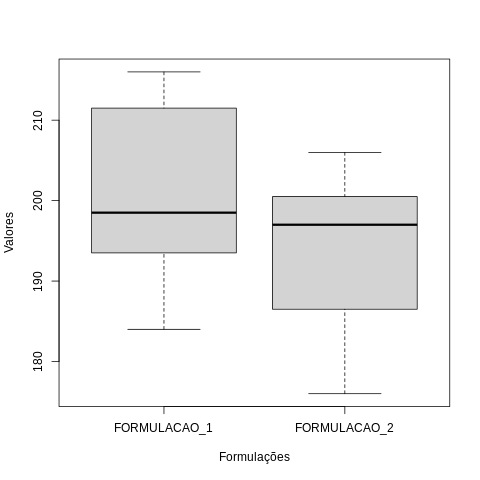

In [57]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
# https://pt.wikipedia.org/wiki/Diagrama_de_caixa
boxplot(value ~ FORMULACAO, data = FORMULACAO, ylab="Valores", xlab="Formulações")

# 2. (1,0 ponto) O fabricante de um produto está investigando a resistência à ruptura de uma nova fibra sintética, que será utilizada para confecção de camisas de uso masculino. A resistência é geralmente afetada pela porcentagem de algodão usado na mistura de materiais para a fibra. O fabricante realizou um experimento com cinco níveis do conteúdo de algodão e reproduziu o experimento cinco vezes. Os dados estão apresentados na tabela a seguir.

a) Há evidências para apoiar a alegação de que a porcentagem de algodão afeta a média de resistência da nova
fibra? Use α = 0,05.

b) Se necessário, faça comparações entre os pares de médias. Que conclusões você pode tirar?

# 3. (2,0 pontos) A resistência à tração do cimento Portland está sendo estudada. Quatro diferentes técnicas de mistura foram usadas e os seguintes dados coletados:

a) Avalie se os pressupostos para a análise de variância são satisfeitos.

b) Teste a hipótese de que a técnica de mistura afeta a resistência do cimento. Use α = 0,05 e justifique a
escolha da técnica utilizada (ANOVA ou Kruskal-Wallis).

c) Se necessário, faça um teste de comparações múltiplas.

# 4. (1,0 ponto) Em um teste com um tipo de fusível, 9 peças foram testadas com 25% de sobrecarga. O tempo médio até queimar dessa amostra foi x 19, 2 minutos, com desvio-padrão populacional conhecido   2, 4 minutos. Sabendo que a população é normal calcule o intervalo de confiança 95% para a média μ da população.

# 5. (1,0 ponto) A eficácia da publicidade de duas marcas rivais de café foi comparada. Os participantes avaliaram
anúncios das duas marcas e classificaram a probabilidade geral de comprar o produto (de 0 a 10, com 10 sendo
"definitivamente vai comprar" o produto"). Metade dos participantes deu notas para um dos produtos, a outra metade
deu classificações para o outro produto.

Determine o teste a ser usado para verificar se existe diferença entre os dois grupos, realize o teste escolhido com 95% de confiança e discuta o significado dos resultados.

# 6. (1,0 ponto) Os dados a seguir indicam a soma de notas obtidas por um grupo de alunos, homens e mulheres, do curso de engenharia. Use o teste de Mann-Whitney para determinar se os valores diferem entre homens e mulheres.Investigue se os empates observados interferem no resultado.

# 7. (1,0 ponto) O batimento cardíaco de um grupo de sete alunos, em batimento por minuto (bpm), foi aferido antes do exercício (I), imediatamente após o exercício (II), e 5 minutos após o exercício (III). Use o teste estatístico de Friedman para avaliar as diferenças entre os valores nas três situações. Aplique o teste de comparações múltiplas não paramétrico, se necessário.

# 8. (1,0 ponto) Use o teste de comparações múltiplas da menor diferença significativa para avaliar os resultados do exercício a seguir. Antes, faça o teste de Kruskall-Wallis.

# 9. (1,0 ponto) Considere os dados abaixo sobre os 574 gols marcados nas 232 partidas em Copas do Mundo de futebol, desde a Copa do Uruguai em 1930 até a Copa do Japão/Coreia em 2002. Os dados foram organizados em classes que representam intervalos de tempo entre gols sucessivos. Utilizando o teste Qui-quadrado verifique aderência ao modelo de Exponencial.

Dica: a distribuição exponencial é usada para descrever intervalos de tempo entre eventos sucessivos e possui a
seguinte expressão: f(x) = λ*e-λx